**Example 1:**
We will use K-means to perform color segmentation on an image.

In [2]:
# Mount Google Drive so that we can access the picture
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of your image
# Note that your Google Drive path ALWAYS starts with "/content/drive/MyDrive/"
path = "/content/drive/MyDrive/courses/grado_itinerario_DA/2023/"

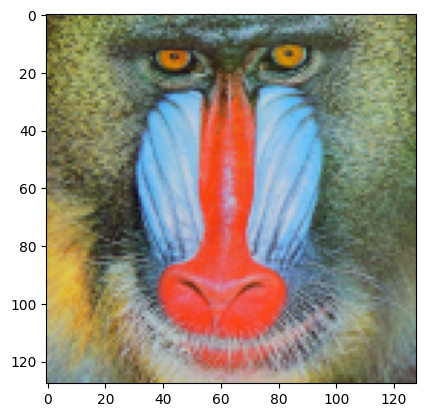

In [7]:
# Let's load the image to which we want to apply color segmentation and plot it
import matplotlib.pyplot as plt
import PIL
img = PIL.Image.open(path + "mandrill-small.tiff")
plt.imshow(img)


In [8]:
# Let's check its size
import numpy as np
rgb_pixels_big = np.array(img)
rgb_pixels_big.shape

(128, 128, 3)

Image of 128 x 128 pixels, with each pixel having 3 channels (R, G, B)

In [9]:
# Let's reshape the image to a vector of pixels (ponemos la imagen en un vector)
img_vector = np.array(img)
img_vector = img_vector.reshape((128*128, 3))
img_vector.shape

(16384, 3)

In [10]:
# We will now apply Kmeans with K=16 to cluster similar pixels together
from sklearn.cluster import KMeans
k = 16
kmeans = KMeans(n_clusters=k)

# Cluster assignmet for each pixel is stored in vector 'y_pred'
y_pred = kmeans.fit_predict(img_vector)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# y_pred contains the cluster assignment to each pixel (it should range from 0 to 15)
y_pred

array([10, 10,  4, ..., 10, 10, 10], dtype=int32)

In [12]:
# We can check how many pixels are assigned to each cluster
np.unique(y_pred, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32),
 array([1441,  868,  866, 1273, 1095, 1309,  488,  437,  954, 1482, 1883,
         504, 1154,  315,  775, 1540]))

In [13]:
# Let's check the centroids (representative) for each cluster
# The clsuter representative is the average of all pixels assigned to that cluster,
# so it can be viewed as the "average pixel" (it should have 3 values for the R, G, B channles)
kmeans.cluster_centers_

array([[124.72072072, 123.50866251,  78.61954262],
       [115.92881745, 181.62686567, 226.33409874],
       [239.87297921,  74.70323326,  39.65473441],
       [154.86959937, 155.66614297, 102.43912019],
       [ 58.8021978 ,  57.98076923,  46.32417582],
       [143.65853659, 157.04801829, 143.49161585],
       [ 95.92989691, 135.97113402, 171.64536082],
       [207.23744292, 118.55936073, 122.34246575],
       [178.35146444, 172.89225941, 164.41213389],
       [117.392833  , 132.67951318, 119.84854632],
       [ 85.76398508,  91.07192328,  68.77144379],
       [203.90873016, 169.61507937,  76.54166667],
       [157.29896014, 192.68284229, 221.74003466],
       [171.83492063, 110.61904762,  45.86666667],
       [230.23126615,  90.2881137 ,  78.59431525],
       [ 93.13656958, 109.78964401, 101.67508091]])

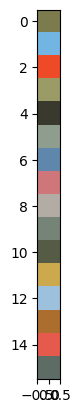

In [14]:
# Let's plot the centroids to understand better how the clusters look like
tmp = kmeans.cluster_centers_.reshape(16,1,3)
plt.imshow(np.uint8(tmp))

In [15]:
tmp.shape

(16, 1, 3)

In [ ]:
# Let's plot some of the pixels assigned to a specific cluster
# cluster = 0
# tmp = np.unique(y_pred, return_counts=True)
# num_pixels_assigned_to_cluster = tmp[1][cluster]
# num_pixels_assigned_to_cluster

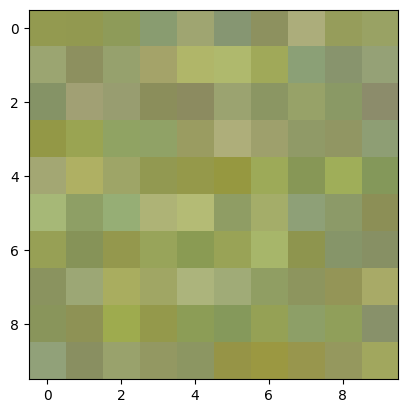

In [16]:
cluster = 3
pixels_in_cluster = img_vector[y_pred == cluster][0:100]
tmp1 = pixels_in_cluster.reshape(10, 10, 3)
plt.imshow(np.uint8(tmp1))


In [17]:
pixels_in_cluster[0:400].shape

(100, 3)

In [19]:
# Now we need to substitute the pixel in the original image by the centroid of the cluster they are assigned to
new_image_vector = kmeans.cluster_centers_[y_pred]
new_image_vector.shape

(16384, 3)

In [20]:
# Let's check the pixel value (R,G,B) of the first pixel
new_image_vector[0]

array([85.76398508, 91.07192328, 68.77144379])

Does it make sense?

In [21]:
# Let's chec the cluster assignment of teh first pixel
y_pred[0]

10

In [22]:
# The new pixel should have values equal to the centroid of that cluster
kmeans.cluster_centers_[10]

array([85.76398508, 91.07192328, 68.77144379])

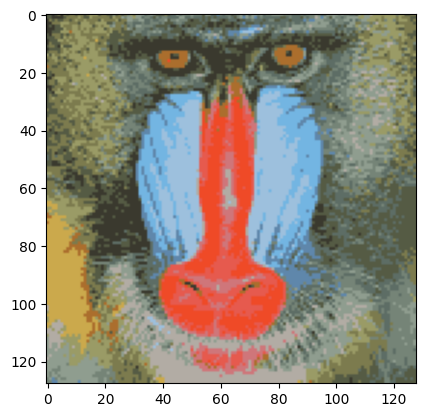

In [23]:
# Reshape back to (128,128,3) to plot it
new_image = new_image_vector.reshape(128,128,3)
plt.imshow(np.uint8(new_image))

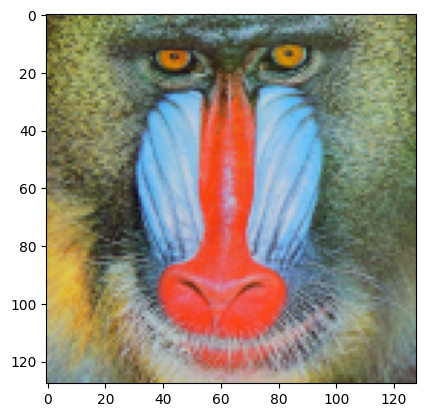

In [24]:
# Let's plot the original image for comparison
plt.imshow(img)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

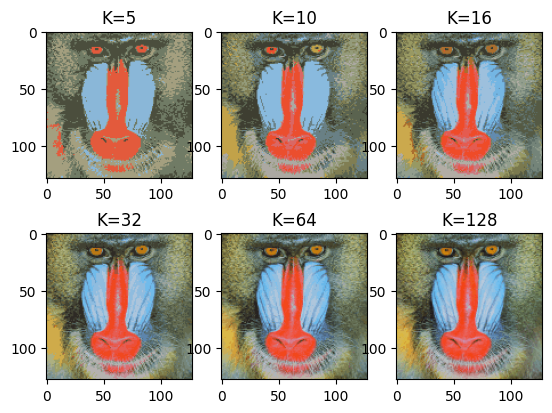

In [25]:
# Let's see how the reconstruction changes for different values of K
knumber = [5, 10, 16, 32, 64, 128]
f, axarr = plt.subplots(2,3)
row = 0
col = 0
for k in knumber:
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(img_vector)
  new_image_vector = kmeans.cluster_centers_[y_pred]
  new_image = new_image_vector.reshape(128,128,3)
  axarr[row,col].imshow(np.uint8(new_image))
  axarr[row,col].set_title(f"K=%d" % k)
  col += 1
  if col == 3:
    row = 1
    col = 0